데이터 로드 성공: dataset/Crop_recommendation.csv
데이터 크기: (2200, 8)

결측치 현황:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

기술통계량:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


기본 통계 정보:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  

결측치 현황:
N      

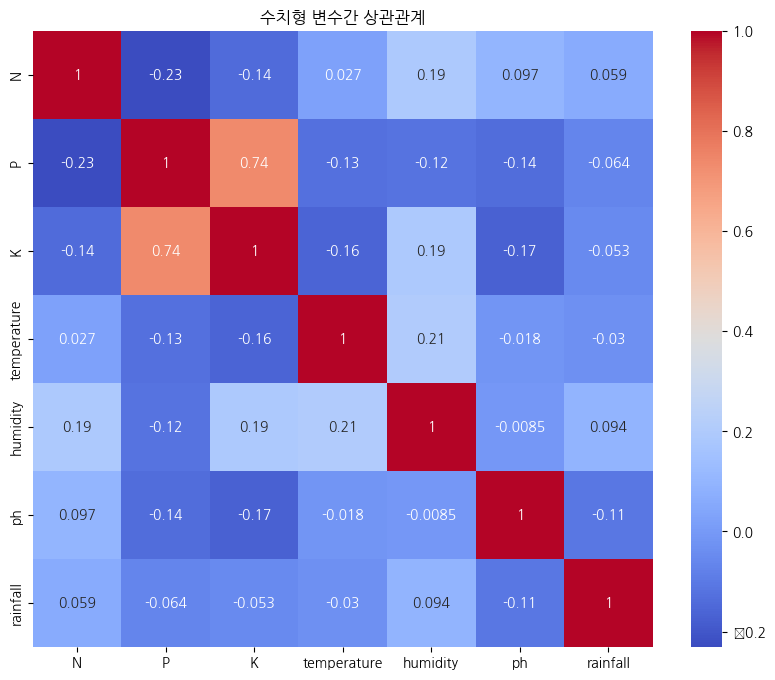

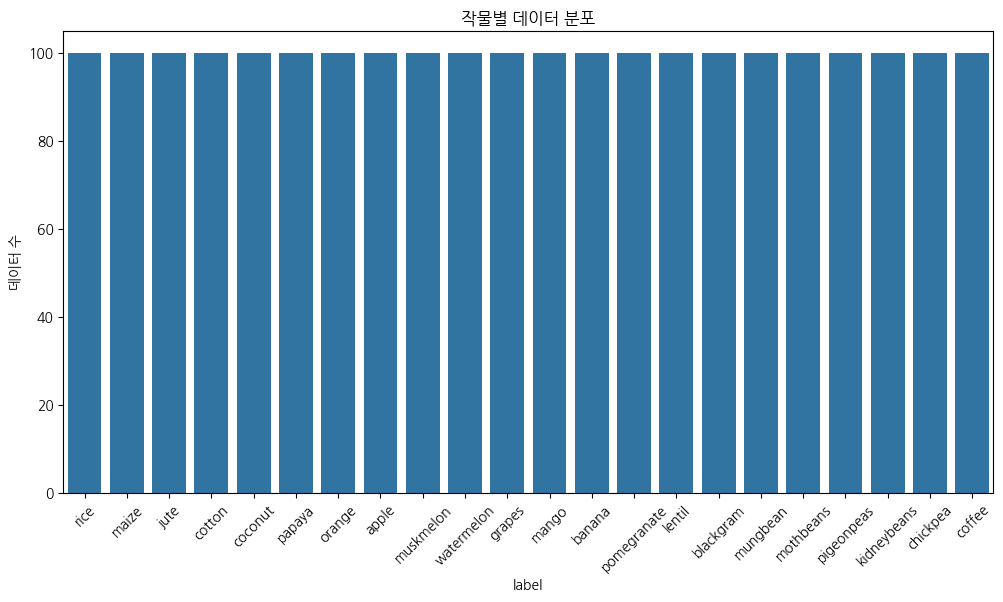

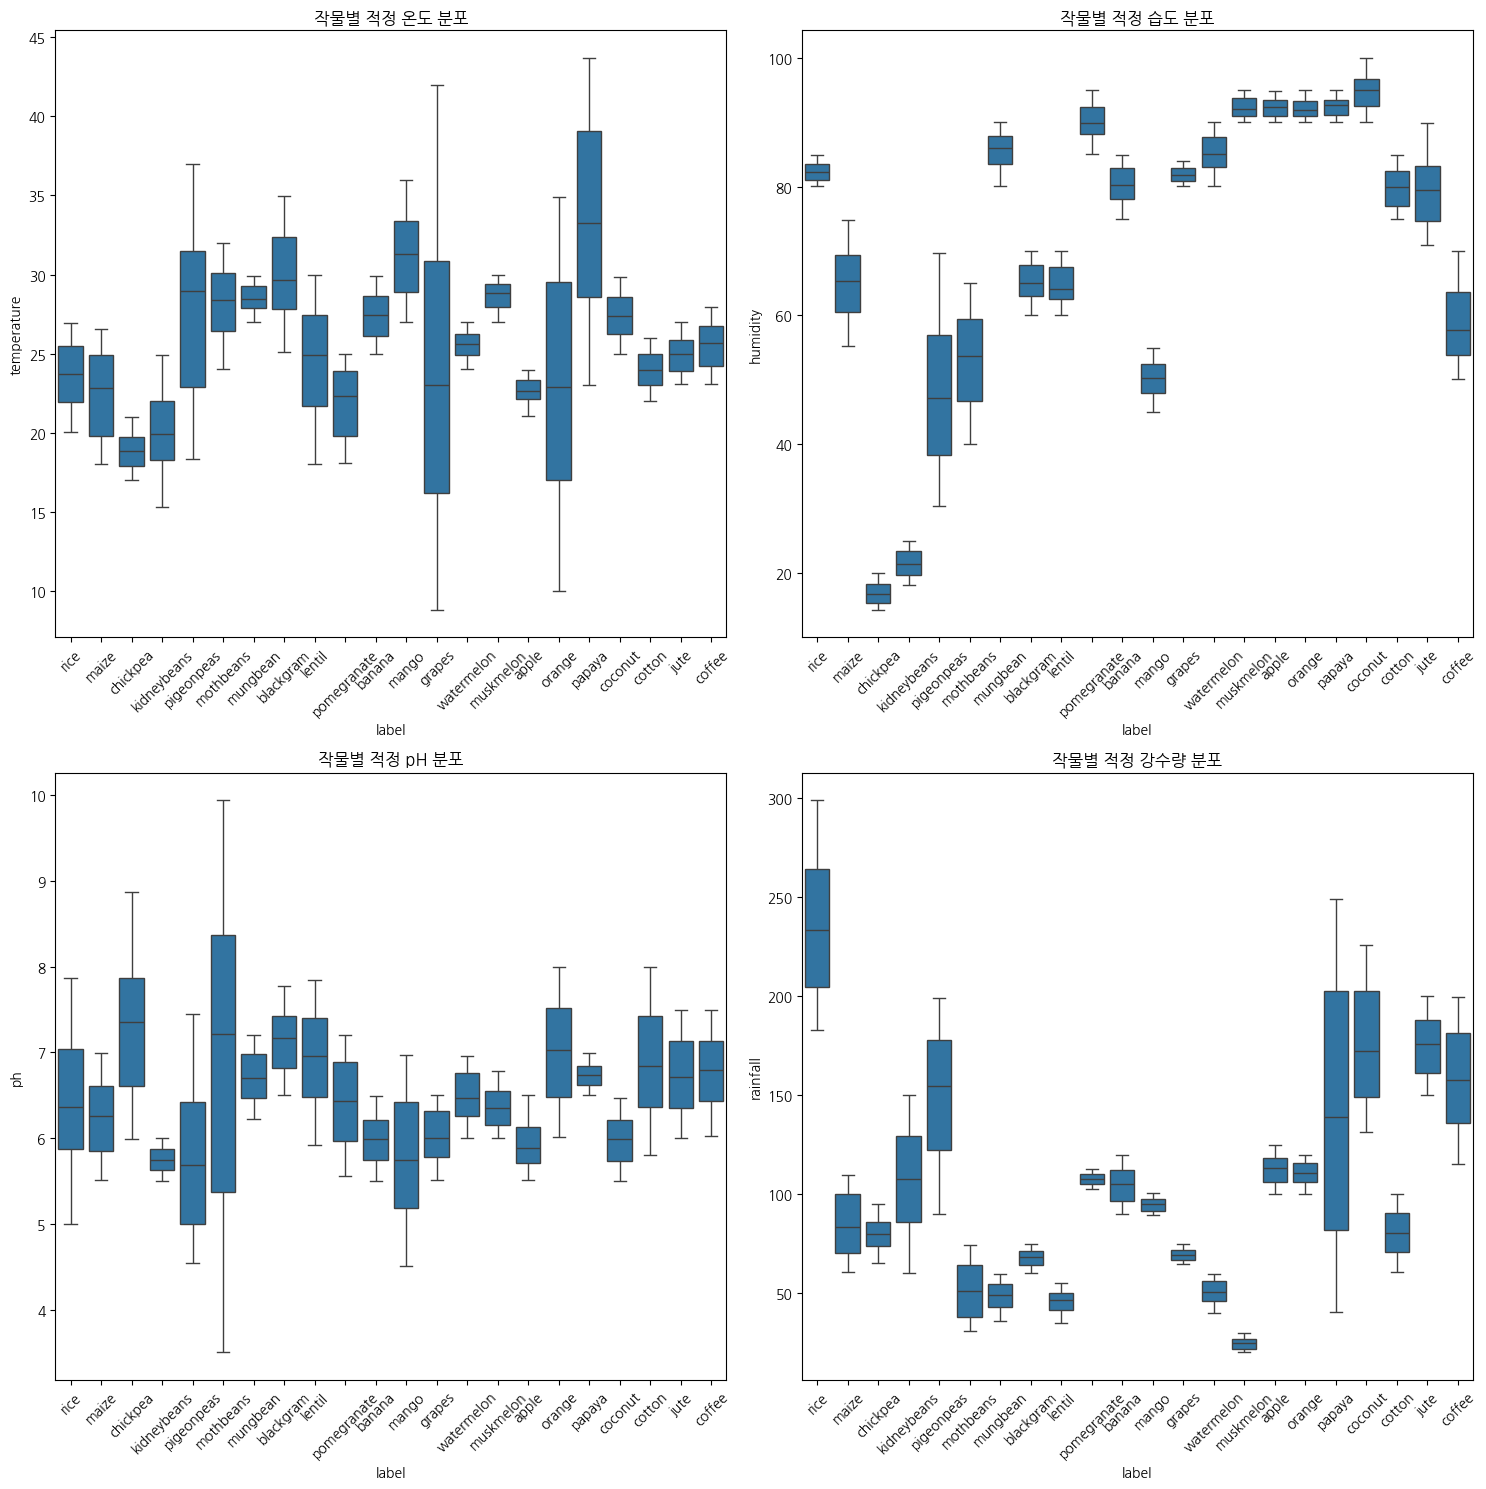


작물별 평균 영양소 요구량:
                  N       P       K
label                              
apple         20.80  134.22  199.89
banana       100.23   82.01   50.05
blackgram     40.02   67.47   19.24
chickpea      40.09   67.79   79.92
coconut       21.98   16.93   30.59
coffee       101.20   28.74   29.94
cotton       117.77   46.24   19.56
grapes        23.18  132.53  200.11
jute          78.40   46.86   39.99
kidneybeans   20.75   67.54   20.05
lentil        18.77   68.36   19.41
maize         77.76   48.44   19.79
mango         20.07   27.18   29.92
mothbeans     21.44   48.01   20.23
mungbean      20.99   47.28   19.87
muskmelon    100.32   17.72   50.08
orange        19.58   16.55   10.01
papaya        49.88   59.05   50.04
pigeonpeas    20.73   67.73   20.29
pomegranate   18.87   18.75   40.21
rice          79.89   47.58   39.87
watermelon    99.42   17.00   50.22


<Figure size 1200x600 with 0 Axes>

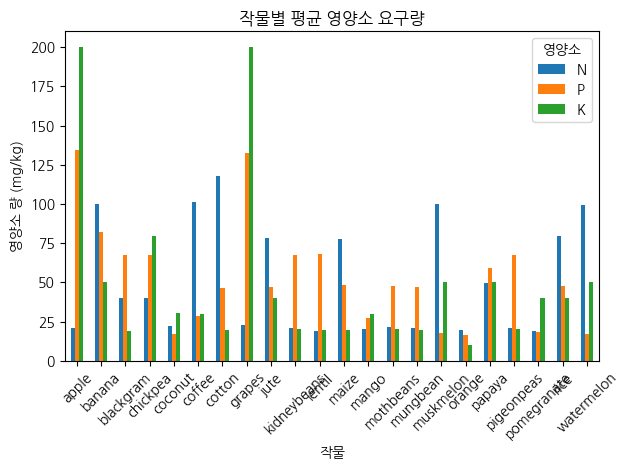


작물별 최적 재배 조건 요약:
            temperature             humidity                   ph            \
                   mean       std       mean        std      mean       std   
label                                                                         
apple         22.630942  0.827404  92.333383   1.458551  5.929663  0.268932   
banana        27.376798  1.428359  80.358123   2.805481  5.983893  0.270650   
blackgram     29.973340  2.686357  65.118426   2.798326  7.133952  0.372533   
chickpea      18.872847  1.169838  16.860439   1.711979  7.336957  0.801127   
coconut       27.409892  1.385734  94.844272   2.686329  5.976562  0.287632   
coffee        25.540477  1.502635  58.869846   5.838566  6.790308  0.417132   
cotton        23.988958  1.135681  79.843474   3.050955  6.912675  0.627170   
grapes        23.849575  9.738649  81.875228   1.177111  6.025937  0.298265   
jute          24.958376  1.185138  79.639864   5.507798  6.732778  0.446349   
kidneybeans   20.115085  2.599573 

In [32]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rc('font', family='NanumGothic')

def loadData(file_path="dataset/Crop_recommendation.csv"):
    try:
        df = pd.read_csv(file_path)
        print(f"데이터 로드 성공: {file_path}")
        print(f"데이터 크기: {df.shape}")
        
        selected_features = [
            'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'
        ]
        df = df[selected_features]
        
        print("\n결측치 현황:")
        print(df.isnull().sum())
        
        print("\n기술통계량:")
        print(df.describe())
        
        return df
    except FileNotFoundError:
        print(f"Error: {file_path} 파일을 찾을 수 없습니다.")
        return None

def perform_eda(df):
    print("\n전체 데이터 프로파일링 리포트 생성 중...")
    profile = ProfileReport(df, title="작물 추천 데이터 분석 리포트")
    profile.to_file("Crop_report.csv")
    
def analyze_categorical(df):
    """범주형 데이터(작물) 분석 함수"""
    
    # 1. 작물 빈도 분석
    plt.figure(figsize=(12, 6))
    crop_counts = df['label'].value_counts()
    sns.barplot(x=crop_counts.index, y=crop_counts.values)
    plt.title('작물별 데이터 분포')
    plt.xticks(rotation=45)
    plt.ylabel('데이터 수')
    plt.show()
    
    # 1. 작물별 환경 조건 분석(박스플롯)
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    
    # 온도
    sns.boxplot(x='label', y='temperature', data=df, ax=axes[0,0])
    axes[0,0].set_title('작물별 적정 온도 분포')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 습도
    sns.boxplot(x='label', y='humidity', data=df, ax=axes[0,1])
    axes[0,1].set_title('작물별 적정 습도 분포')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # pH
    sns.boxplot(x='label', y='ph', data=df, ax=axes[1,0])
    axes[1,0].set_title('작물별 적정 pH 분포')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 강수량
    sns.boxplot(x='label', y='rainfall', data=df, ax=axes[1,1])
    axes[1,1].set_title('작물별 적정 강수량 분포')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 3. 작물별 영양소 요구량 평균
    nutrient_means = df.groupby('label')[['N', 'P', 'K']].mean()
    print("\n작물별 평균 영양소 요구량:")
    print(nutrient_means)
    
    # 4. 작물별 영양소 요구량 시각화
    plt.figure(figsize=(12, 6))
    nutrient_means.plot(kind='bar')
    plt.title('작물별 평균 영양소 요구량')
    plt.xlabel('작물')
    plt.ylabel('영양소 량 (mg/kg)')
    plt.legend(title='영양소')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
def main_eda():
    df = loadData()
    
    if df is not None:
        perform_eda(df)
        
        print("\n기본 통계 정보:")
        print(df.describe())
        
        print("\n결측치 현황:")
        print(df.isnull().sum())
        
         # 수치형 변수 상관관계
        numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
        plt.title('수치형 변수간 상관관계')
        plt.show()
        
        # 범주형(작물) 데이터 분포도 추가
        analyze_categorical(df)
        
        # 5. 작물별 최적 조건 요약
        print("\n작물별 최적 재배 조건 요약:")
        optimal_conditions = df.groupby('label').agg({
            'temperature': ['mean', 'std'],
            'humidity': ['mean', 'std'],
            'ph': ['mean', 'std'],
            'rainfall': ['mean', 'std']
        })
        print(optimal_conditions)

if __name__ == "__main__":
    main_eda()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

In [34]:
# 데이터 로드
df = pd.read_csv('dataset/Crop_recommendation.csv')
print("데이터 크기:", df.shape)
df.head()

데이터 크기: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [38]:
# 데이터 전처리
# Label Encoding
le = LabelEncoder()
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[numeric_cols]
y = le.fit_transform(df['label'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)
print("\n레이블 인코딩 매핑:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

학습 데이터 크기: (1760, 7)
테스트 데이터 크기: (440, 7)

레이블 인코딩 매핑:
apple: 0
banana: 1
blackgram: 2
chickpea: 3
coconut: 4
coffee: 5
cotton: 6
grapes: 7
jute: 8
kidneybeans: 9
lentil: 10
maize: 11
mango: 12
mothbeans: 13
mungbean: 14
muskmelon: 15
orange: 16
papaya: 17
pigeonpeas: 18
pomegranate: 19
rice: 20
watermelon: 21


데이터 분리


독립변수(X): 7개의 수치형 변수

토양 영양분: 질소, 인, 칼륨

환경 조건: temperature, humidity, ph, rainfall


종속변수(y): label(작물명)


전처리 단계


수치형 변수(X)

StandardScaler 적용
평균 0, 표준편차 1로 정규화
스케일이 다른 변수들을 동일한 범위로 조정


범주형 변수(y)

LabelEncoder 적용
22개 작물명을 0~21 사이의 정수로 변환
예: apple → 0, banana → 1, ... , watermelon → 21




데이터 분할


train_test_split 사용
학습 데이터 80%, 테스트 데이터 20%로 분할

In [39]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 모델 성능 평가
train_score = rf_model.score(X_train_scaled, y_train)
test_score = rf_model.score(X_test_scaled, y_test)

print("학습 데이터 정확도: {:.2%}".format(train_score))
print("테스트 데이터 정확도: {:.2%}".format(test_score))

학습 데이터 정확도: 100.00%
테스트 데이터 정확도: 99.32%


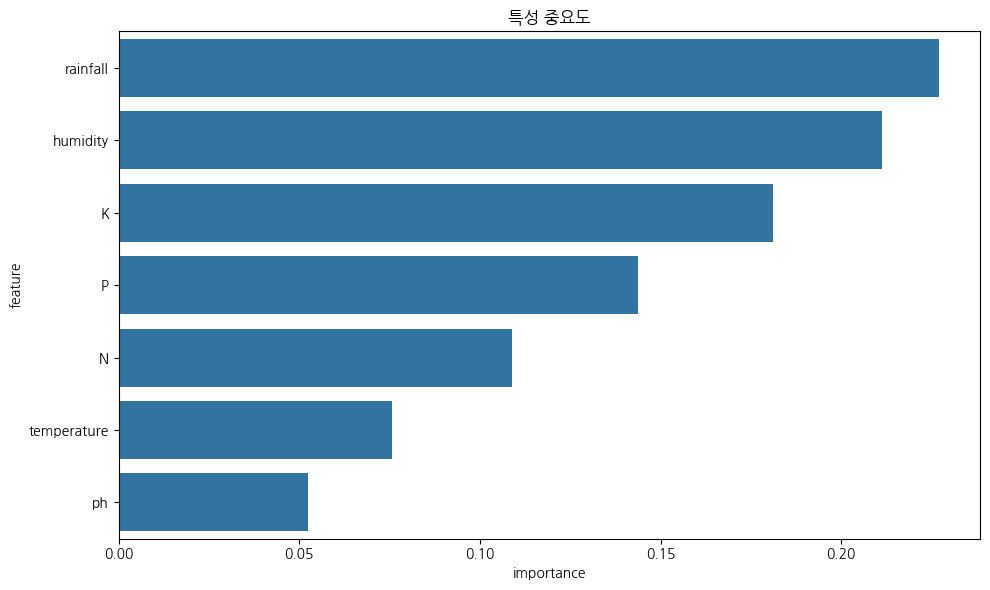


특성 중요도:
       feature  importance
6     rainfall    0.227036
4     humidity    0.211279
2            K    0.181222
1            P    0.143622
0            N    0.108859
3  temperature    0.075682
5           ph    0.052301


In [40]:
# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'feature': numeric_cols,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('특성 중요도')
plt.tight_layout()
plt.show()

print("\n특성 중요도:")
print(feature_importance)

In [41]:
# 분류 보고서
y_pred = rf_model.predict(X_test_scaled)
print("분류 보고서:")
print(classification_report(y_test, y_pred, 
                          target_names=le.classes_))

분류 보고서:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       

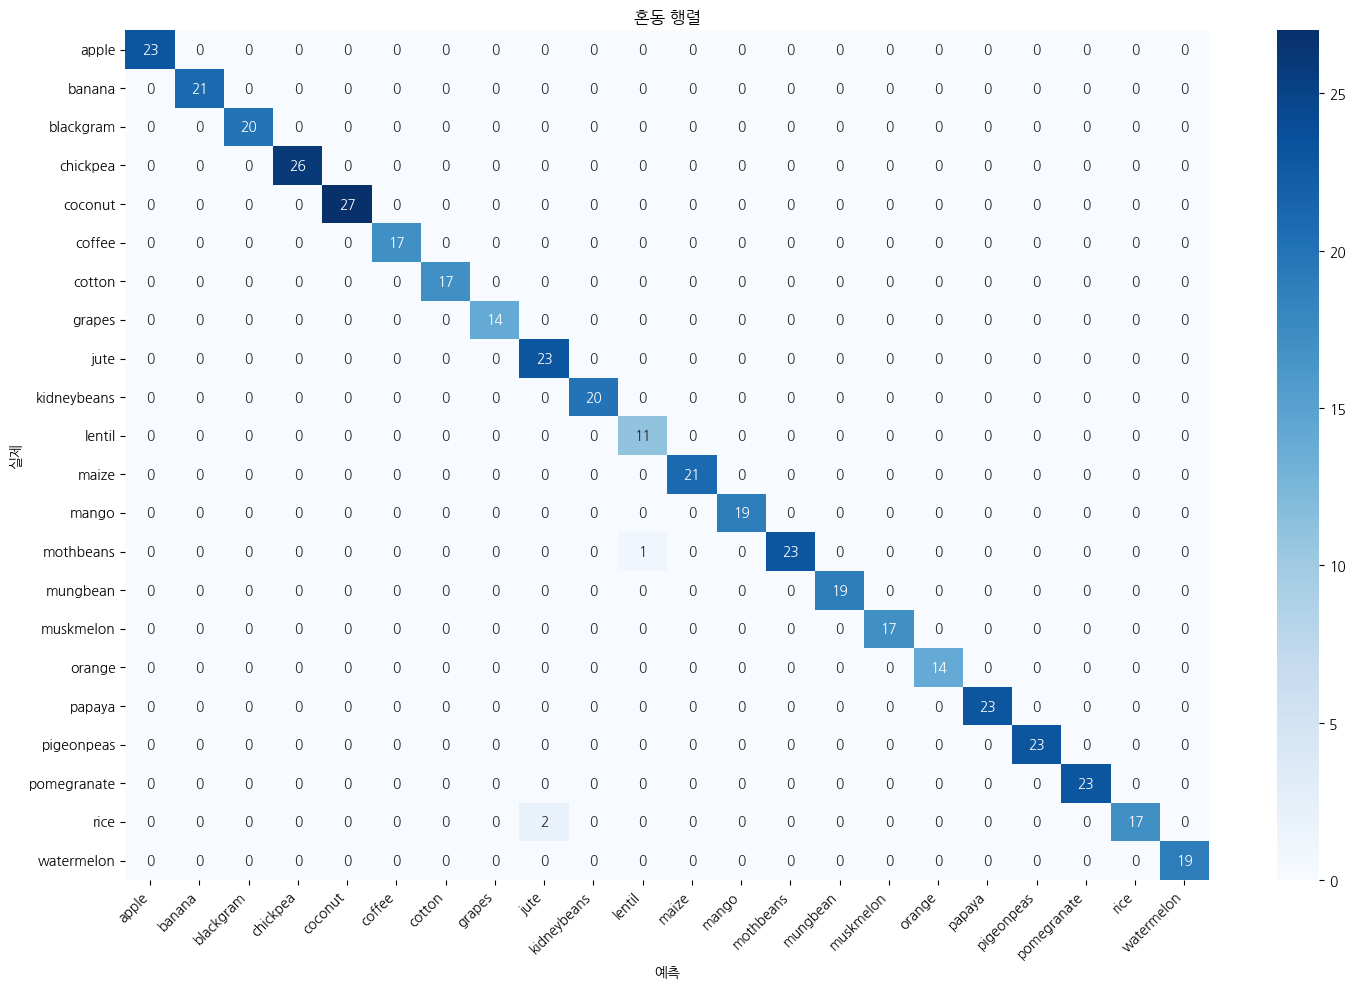

In [42]:
# 혼동 행렬 시각화
plt.figure(figsize=(15, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('혼동 행렬')
plt.xlabel('예측')
plt.ylabel('실제')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [47]:
# 예측 함수 생성
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # 입력값을 데이터프레임으로 변환
    input_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                             columns=numeric_cols)
    
    # 스케일링
    input_scaled = scaler.transform(input_data)
    
    # 예측
    prediction = rf_model.predict(input_scaled)
    
    # 예측 확률
    prob = rf_model.predict_proba(input_scaled)
    prob_sorted = sorted(zip(le.classes_, prob[0]), key=lambda x: x[1], reverse=True)
    
    print("추천 작물:", le.classes_[prediction[0]])
    print("\n상위 3개 추천 작물 및 확률:")
    for crop, probability in prob_sorted[:3]:
        print(f"{crop}: {probability:.2%}")

# 예시 데이터로 테스트
predict_crop(90, 40, 40, 20, 80, 7, 200)

추천 작물: rice

상위 3개 추천 작물 및 확률:
rice: 75.00%
jute: 25.00%
apple: 0.00%


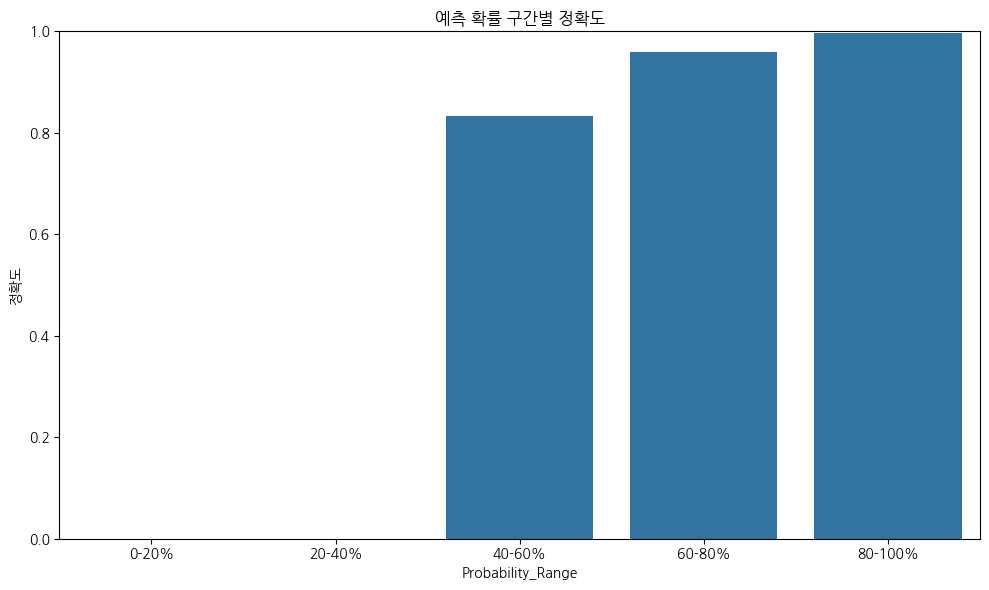

In [50]:
# 예측 확률 구간별 정확도 분석
prediction_proba = rf_model.predict_proba(X_test_scaled)
y_pred = rf_model.predict(X_test_scaled)

# 예측 확률과 정확성 비교를 위한 데이터프레임
analysis_df = pd.DataFrame({
    'Correct': y_test == y_pred,
    'Prediction_Probability': np.max(prediction_proba, axis=1)
})

# 확률 구간별 정확도 계산
analysis_df['Probability_Range'] = pd.cut(analysis_df['Prediction_Probability'], 
                                        bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                        labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

probability_accuracy = analysis_df.groupby('Probability_Range')['Correct'].agg(['count', 'mean'])
probability_accuracy.columns = ['Count', 'Accuracy']

# 예측 확률과 정확도 관계 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=probability_accuracy.index, y='Accuracy', data=probability_accuracy)
plt.title('예측 확률 구간별 정확도')
plt.ylabel('정확도')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [45]:
# 정확도 세부 분석
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# 1. 기본 정확도 지표들
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("모델 성능 평가:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

모델 성능 평가:
Accuracy: 0.9932
Precision: 0.9937


데이터의 특성


작물마다 필요한 생육 조건이 명확히 구분됨
NPK, 온도, 습도 등이 작물별로 뚜렷한 패턴을 보임
실제 농업 지식과 일치하는 패턴


성능 평가


훈련 데이터: 100%
테스트 데이터: 99.32%
두 데이터셋의 성능 차이가 매우 작음 (0.68%)


혼동 행렬 분석


대부분의 작물이 정확히 분류됨
발생한 오분류도 비슷한 특성의 작물 간에 발생
무작위한 오류가 아닌 패턴이 있는 오류


예측 확률 분포


대부분의 예측이 높은 신뢰도를 보임
낮은 확률의 불확실한 예측이 거의 없음

따라서 이 높은 정확도는 과적합이라기보다는, 명확한 패턴을 가진 데이터를 잘 학습한 결과로 판단.
